# Klasifikasi Support Vector Machine (SVM)

## Import module / package

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
datasenti = pd.read_csv(r"data/tweets_labelled_tokenized.csv")
datasenti.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['berdiri', 'di', 'atas', 'kaki', 'sendiri', '...",-2,Negatif
2,"['penyebab', 'harga', 'telur', 'anjlok', 'vers...",-1,Negatif
3,"['turunnya', 'permintaan', 'masyarakat', 'telu...",-1,Negatif
4,"['peternak', 'ayam', 'petelur', 'mengaku', 'me...",1,Positif


## Split Data (Test & Train)

In [3]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(datasenti['tweet'], datasenti['sentimen'], test_size = 0.1, random_state = 42)

In [4]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X
data_train['sentimen'] = train_Y

data_test = pd.DataFrame()
data_test['tweet'] = test_X
data_test['sentimen'] = test_Y

In [5]:
# data_train.to_csv(r"df_trainsvm.csv")
# data_test.to_csv(r"df_testsvm.csv")

## TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

datatfidf = TfidfVectorizer(max_features = 5000)
datatfidf.fit(datasenti['tweet'].values.astype('U'))
train_X_datatfidf = datatfidf.transform(data_train['tweet'].values.astype('U'))
test_X_datatfidf = datatfidf.transform(data_test['tweet'].values.astype('U'))

In [7]:
datatfidf

TfidfVectorizer(max_features=5000)

In [8]:
print(test_X_datatfidf)

  (0, 4718)	0.29126863209984605
  (0, 4381)	0.45636265198016035
  (0, 4326)	0.0859194016118799
  (0, 4011)	0.18578980962931133
  (0, 3962)	0.21591755319090725
  (0, 3665)	0.2424576291609905
  (0, 3503)	0.18086883413424903
  (0, 3087)	0.24715922889379166
  (0, 2752)	0.29126863209984605
  (0, 2706)	0.29126863209984605
  (0, 2182)	0.25900631403759466
  (0, 2014)	0.21390502281916982
  (0, 1711)	0.2346008125681669
  (0, 1378)	0.035516669950536824
  (0, 928)	0.29126863209984605
  (0, 105)	0.2052743356036768
  (1, 4446)	0.512404997862957
  (1, 4326)	0.12468145337969237
  (1, 2571)	0.4235991483022605
  (1, 1774)	0.4736254460052394
  (1, 1378)	0.10307962917720065
  (1, 183)	0.514389306851672
  (1, 97)	0.20716317927536093
  (2, 4940)	0.25261543926566
  (2, 4830)	0.20055729751261106
  :	:
  (284, 1895)	0.42238658525958833
  (284, 1488)	0.39270535091596714
  (284, 1378)	0.17569043307565177
  (285, 4326)	0.06897084222568797
  (285, 4171)	0.37664637616423935
  (285, 3562)	0.38926032010364586
  (285,

In [9]:
print(train_X_datatfidf)

  (0, 4326)	0.1067641713310835
  (0, 3166)	0.7238657057075818
  (0, 2881)	0.5064271080595512
  (0, 1662)	0.44761639694272837
  (0, 1378)	0.08826662580444133
  (1, 4326)	0.14408331869877541
  (1, 2697)	0.5260558242935783
  (1, 2612)	0.5833896544250018
  (1, 1471)	0.5898916875735374
  (1, 1378)	0.1191200026908672
  (2, 4737)	0.2396400187809026
  (2, 4670)	0.2961828933827369
  (2, 4313)	0.10427747387850324
  (2, 3500)	0.3232697825404699
  (2, 2921)	0.2743141600980124
  (2, 2773)	0.2566514308954176
  (2, 2627)	0.2874628627597628
  (2, 2567)	0.1990774114910737
  (2, 1378)	0.03941882134268364
  (2, 1329)	0.19520512524113795
  (2, 198)	0.13569815381721667
  (2, 89)	0.6465395650809398
  (3, 4313)	0.1257085655992977
  (3, 3859)	0.2812346241685436
  (3, 3227)	0.21592705857612984
  :	:
  (2589, 4706)	0.44205257590739283
  (2589, 4326)	0.16836389265051235
  (2589, 1378)	0.13919381873416248
  (2589, 1006)	0.8237790331299503
  (2589, 97)	0.2797432844357317
  (2590, 4326)	0.04704525260988821
  (2590,

In [10]:
print(test_X_datatfidf.shape)
print(train_X_datatfidf.shape)

(288, 5000)
(2591, 5000)


## Klasifikasi SVM (Kernel Linear)

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_datatfidf,train_Y)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import accuracy_score

predictionsSVM = model.predict(test_X_datatfidf)
test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X
test_prediction['sentimen'] = predictionsSVM
SVMaccuracy = accuracy_score(predictionsSVM, test_Y)*100
SVMaccuracy= round(SVMaccuracy,1)

In [13]:
test_prediction

,tweet,sentimen
471,"['salah', 'solusi', 'memecahkan', 'turunya', '...",Positif
1453,"['harga', 'telur', 'ayam', 'kota', 'cimahi', '...",Positif
2377,"['coba', 'mikir', 'ala', 'peternak', 'ditangka...",Positif
1601,"['harga', 'telur', 'prediksi', 'rp', 'kg', 'ja...",Positif
1094,"['harga', 'telur', 'menguntungkan', 'produsen'...",Positif
...,...,...
1097,"['perbaiki', 'harga', 'telur', 'peternak', 'di...",Positif
1425,"['harga', 'jagung', 'murah', 'petani', 'sengsa...",Positif
1764,"['habis', 'harga', 'ikan', 'mahal', 'sardin', ...",Positif
1127,"['perbaiki', 'harga', 'telur', 'supays', 'telu...",Positif


## Mengecek Akurasi

In [14]:
print("Akurasi SVM : ",SVMaccuracy, "%")

Akurasi SVM :  88.2 %


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y, predictionsSVM)*100, "%")
print("Support Vector Machine Precision:", precision_score(test_Y, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine Recall:", recall_score(test_Y, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine f1_score:", f1_score(test_Y, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y, predictionsSVM))

Support Vector Machine Acuracy: 88.19444444444444 %
Support Vector Machine Precision: 89.30041152263375 %
Support Vector Machine Recall: 96.44444444444444 %
Support Vector Machine f1_score: 92.73504273504274 %

              precision    recall  f1-score   support

     Negatif       0.82      0.59      0.69        63
     Positif       0.89      0.96      0.93       225

    accuracy                           0.88       288
   macro avg       0.86      0.78      0.81       288
weighted avg       0.88      0.88      0.87       288



Support Vector Machine Acuracy: 88.2 %


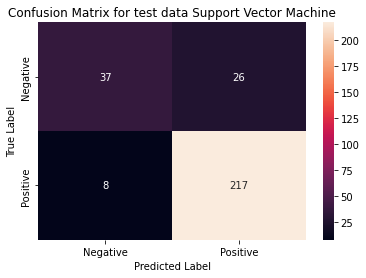

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

conf_mat = confusion_matrix(test_Y, predictionsSVM)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()